In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

from sklearn.preprocessing import scale
from torchmtlr.utils import make_time_bins, encode_survival

import torch

In [6]:
df = make_data("/cluster/projects/radiomics/RADCURE-challenge/data/training/clinical.csv")
df

,target_binary,time,event,age at dx,Dose,Chemotherapy,cancer_death,Sex_Male,T Stage_T3/4,N Stage_N1,...,Disease Site_lip & oral cavity,Disease Site_nasal cavity,Disease Site_nasopharynx,Disease Site_oropharynx,Disease Site_paranasal sinus,Disease Site_salivary glands,Stage_III/IV,ECOG_>0,HPV Combined_0.0,HPV Combined_1.0
Study ID,,,,,,,,,,,,,,,,,,,,,
RADCURE303,0,72.460274,0,66.7,70.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
RADCURE304,0,69.600000,0,68.4,70.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
RADCURE305,0,110.071233,0,49.7,70.0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
RADCURE306,0,65.523288,0,88.5,70.0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
RADCURE307,0,61.906849,0,69.8,64.0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RADCURE4124,0,119.178082,0,68.3,70.0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
RADCURE4125,0,135.320548,0,53.9,60.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
RADCURE4126,0,98.268493,1,58.3,70.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df[(df["event"]==0) & (df["cancer_death"]==1)]

,target_binary,time,event,age at dx,Dose,Chemotherapy,cancer_death,Sex_Male,T Stage_T3/4,N Stage_N1,...,Disease Site_lip & oral cavity,Disease Site_nasal cavity,Disease Site_nasopharynx,Disease Site_oropharynx,Disease Site_paranasal sinus,Disease Site_salivary glands,Stage_III/IV,ECOG_>0,HPV Combined_0.0,HPV Combined_1.0
Study ID,,,,,,,,,,,,,,,,,,,,,


In [7]:
time_bins = make_time_bins(df["time"], event=df["event"])       
y1        = encode_survival(df["time"], df["event"], time_bins)
y2        = encode_survival(df["time"], df["cancer_death"], time_bins)


torch.Size([1802, 29])

In [8]:
def events(row):
    event        = row["event"]
    cancer_death = row["cancer_death"]
    #event, cancer_death = row.tolist()
    
    if event==0:
        return 0
    elif cancer_death==0:
        return 1an
    elif cancer_death==1:
        return 2
    else:
        raise UhOh

In [9]:
a = df.apply(lambda x: events(x), axis=1)

In [10]:
a.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 1,


In [11]:
np.where(np.where(df["event"]==0, 0, 1)

SyntaxError: unexpected EOF while parsing (<ipython-input-11-b7732e720c39>, line 1)

torch.Size([1802, 58]) torch.Size([1802, 29])


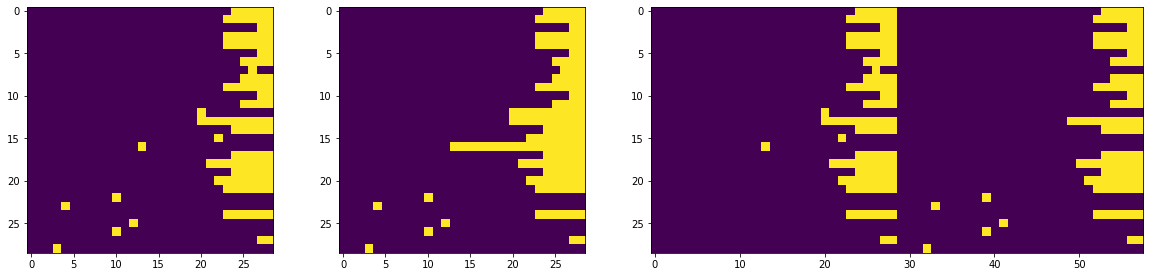

In [13]:
fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios':[1, 1, 2]}, figsize=(20,5))
ax[0].imshow(y1[:29,:])
ax[1].imshow(y2[:29,:])

test = encode_survival(df["time"], a, time_bins)
print(test.shape, y1.shape)
ax[2].imshow(test[:29])

In [87]:
df[df["cancer_death"] < df["event"]]

,target_binary,time,event,age at dx,Dose,Chemotherapy,cancer_death,Sex_Male,T Stage_T3/4,N Stage_N1,...,Disease Site_lip & oral cavity,Disease Site_nasal cavity,Disease Site_nasopharynx,Disease Site_oropharynx,Disease Site_paranasal sinus,Disease Site_salivary glands,Stage_III/IV,ECOG_>0,HPV Combined_0.0,HPV Combined_1.0
Study ID,,,,,,,,,,,,,,,,,,,,,
RADCURE311,0,91.890411,1,65.5,64.0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
RADCURE319,0,50.268493,1,84.3,51.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
RADCURE324,0,57.369863,1,63.1,60.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
RADCURE326,0,24.558904,1,78.9,70.0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,1,0
RADCURE358,0,61.413699,1,72.8,60.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RADCURE4096,0,30.082192,1,52.5,70.0,1,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
RADCURE4097,0,39.386301,1,65.0,70.0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
RADCURE4117,0,104.745205,1,53.7,51.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [89]:
df["cancer_death"].index

Index(['RADCURE303', 'RADCURE304', 'RADCURE305', 'RADCURE306', 'RADCURE307',
       'RADCURE308', 'RADCURE309', 'RADCURE311', 'RADCURE313', 'RADCURE314',
       ...
       'RADCURE4107', 'RADCURE4117', 'RADCURE4120', 'RADCURE4121',
       'RADCURE4122', 'RADCURE4124', 'RADCURE4125', 'RADCURE4126',
       'RADCURE4127', 'RADCURE4128'],
      dtype='object', name='Study ID', length=1802)

In [93]:
df.iloc[idx]

target_binary                      0.000000
time                              91.890411
event                              1.000000
age at dx                         65.500000
Dose                              64.000000
Chemotherapy                       0.000000
cancer_death                       0.000000
Sex_Male                           1.000000
T Stage_T3/4                       1.000000
N Stage_N1                         0.000000
N Stage_N2                         0.000000
N Stage_N3                         0.000000
Disease Site_hypopharynx           0.000000
Disease Site_larynx                0.000000
Disease Site_lip & oral cavity     0.000000
Disease Site_nasal cavity          0.000000
Disease Site_nasopharynx           0.000000
Disease Site_oropharynx            1.000000
Disease Site_paranasal sinus       0.000000
Disease Site_salivary glands       0.000000
Stage_III/IV                       1.000000
ECOG_>0                            0.000000
HPV Combined_0.0                

In [90]:
idx=7

In [91]:
y1[idx,:]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [92]:
y2[idx,:]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.])

In [60]:
y1.shape

torch.Size([1802, 29])

In [65]:
np.where (, np.where(y1 == y2, 2, 1), 0)


array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [64]:
np.argmax([y1, y2], axis=0)

ValueError: only one element tensors can be converted to Python scalars

In [56]:
print(test2.shape)
test2

torch.Size([1802, 29, 2])


tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [0., 0.],
         [1., 1.],
         [1., 1.]],

        ...,

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [1., 1.],
         [0., 1.],
         [0., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         ...,
         [1., 1.],
         [1., 1.],
         [1., 1.]]])

In [48]:
test.shape, test2.shape

((2, 1802, 29), (1802, 29, 2))

In [50]:
test[:,1,:].sum(), test2[1,:,:].sum()

(12.0, 12.0)

In [13]:
df

,target_binary,time,event,age at dx,Dose,Chemotherapy,cancer_death,Sex_Male,T Stage_T3/4,N Stage_N1,...,Disease Site_lip & oral cavity,Disease Site_nasal cavity,Disease Site_nasopharynx,Disease Site_oropharynx,Disease Site_paranasal sinus,Disease Site_salivary glands,Stage_III/IV,ECOG_>0,HPV Combined_0.0,HPV Combined_1.0
Study ID,,,,,,,,,,,,,,,,,,,,,
RADCURE303,0,72.460274,0,66.7,70.0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
RADCURE304,0,69.600000,0,68.4,70.0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
RADCURE305,0,110.071233,0,49.7,70.0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
RADCURE306,0,65.523288,0,88.5,70.0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
RADCURE307,0,61.906849,0,69.8,64.0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RADCURE4124,0,119.178082,0,68.3,70.0,0,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
RADCURE4125,0,135.320548,0,53.9,60.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
RADCURE4126,0,98.268493,1,58.3,70.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
make_time_bins(df.time, event=df.event)

array([  1.93972603,   5.33455099,   6.85540335,   7.8173516 ,
         9.27245053,  10.55342466,  12.5260274 ,  14.22343988,
        15.46179604,  16.83287671,  19.10502283,  22.07853881,
        24.36164384,  26.67519026,  29.24809741,  32.20456621,
        35.27671233,  38.08462709,  40.94246575,  46.8042618 ,
        50.5108067 ,  55.90136986,  61.74977169,  69.69254186,
        78.95525114,  90.75677321, 104.51506849, 134.49863014])

In [5]:
def make_data(path, split="training"):
    """Load and preprocess the data."""
    clinical_data = (pd.read_csv(path)
                     .query("split == @split")
                     .set_index("Study ID")
                     .drop(["split"], axis=1, errors="ignore"))
    if split == "training":
        clinical_data = clinical_data.rename(columns={"death": "event", "survival_time": "time"})
        # Convert time to months
        clinical_data["time"] *= 12
        
    # binarize T stage as T1/2 = 0, T3/4 = 1
    clinical_data["T Stage"] = clinical_data["T Stage"].map(
        lambda x: "T1/2" if x in ["T1", "T1a", "T1b", "T2"] else "T3/4")
    
    # use more fine-grained grouping for N stage
    clinical_data["N Stage"] = clinical_data["N Stage"].map({
        "N0":  "N0",
        "N1":  "N1",
        "N2":  "N2",
        "N2a": "N2",
        "N2b": "N2",
        "N2c": "N2",
        "N3":  "N3",
        "N3a": "N3",
        "N3b": "N3"
    })
    clinical_data["Stage"] = clinical_data["Stage"].map(
        lambda x: "I/II" if x in ["I", "II", "IIA"] else "III/IV")
    
    clinical_data["ECOG"] = clinical_data["ECOG"].map(
        lambda x: ">0" if x > 0 else "0")
    
    clinical_data = pd.get_dummies(clinical_data,
                                   columns=["Sex",
                                            "T Stage",
                                            "N Stage",
                                            "Disease Site",
                                            "Stage",
                                            "ECOG"],
                                   drop_first=True)
    clinical_data = pd.get_dummies(clinical_data, columns=["HPV Combined"])
    return clinical_data

In [4]:
df = make_data("/cluster/projects/radiomics/RADCURE-challenge/data/training/clinical.csv")
df[["Dose", "age at dx"]] = df[["Dose", "age at dx"]].apply(lambda x: scale(x))
df

,target_binary,time,event,age at dx,Dose,Chemotherapy,Sex_Male,T Stage_T3/4,N Stage_N1,N Stage_N2,...,Disease Site_lip & oral cavity,Disease Site_nasal cavity,Disease Site_nasopharynx,Disease Site_oropharynx,Disease Site_paranasal sinus,Disease Site_salivary glands,Stage_III/IV,ECOG_>0,HPV Combined_0.0,HPV Combined_1.0
Study ID,,,,,,,,,,,,,,,,,,,,,
RADCURE303,0,72.460274,0,0.397671,0.614220,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
RADCURE304,0,69.600000,0,0.541313,0.614220,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
RADCURE305,0,110.071233,0,-1.038746,0.614220,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
RADCURE306,0,65.523288,0,2.239664,0.614220,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
RADCURE307,0,61.906849,0,0.659606,-0.405216,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RADCURE4124,0,119.178082,0,0.532863,0.614220,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,1
RADCURE4125,0,135.320548,0,-0.683867,-1.084840,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RADCURE4126,0,98.268493,1,-0.312088,0.614220,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
df = pd.read_csv("/cluster/projects/radiomics/RADCURE-challenge/data/training/clinical.csv")
df

,Study ID,target_binary,survival_time,death,age at dx,Sex,T Stage,N Stage,Stage,Dose,Chemotherapy,HPV Combined,Disease Site,cancer_death,ECOG,split
0,RADCURE303,0,6.038356,0,66.7,Male,T3,N0,III,70.0,0,NaN,larynx,0,0.0,training
1,RADCURE304,0,5.800000,0,68.4,Female,T2,N2b,IVA,70.0,0,NaN,hypopharynx,0,1.0,training
2,RADCURE305,0,9.172603,0,49.7,Female,T1,N2,III,70.0,1,NaN,nasopharynx,0,1.0,training
3,RADCURE306,0,5.460274,0,88.5,Male,T2,N2a,IVA,70.0,0,NaN,oropharynx,0,2.0,training
4,RADCURE307,0,5.158904,0,69.8,Male,T3,N2b,IVA,64.0,0,1.0,oropharynx,0,0.0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,RADCURE4124,0,9.931507,0,68.3,Male,T2,N2b,IVA,70.0,0,1.0,oropharynx,0,1.0,training
1798,RADCURE4125,0,11.276712,0,53.9,Male,T2,N0,II,60.0,0,NaN,larynx,0,0.0,training
1799,RADCURE4126,0,8.189041,1,58.3,Male,T2,N0,II,70.0,0,1.0,oropharynx,0,0.0,training
1800,RADCURE4127,0,5.739726,0,52.4,Female,T2,N2b,IVA,70.0,1,1.0,oropharynx,0,0.0,training


In [11]:
def binned_event(row, months=24) -> list:
    """Exports rows into binned events. 
    
    
    Parameters
    ----------
    row
        pandas.Series row containing target_binary, time, event
    months
        number of months to bin for
    
    Returns
    -------
    binned
        resulting events in bins where 1=event, 0=no_event (number of bins = round(sqrt(months)))
        
        [0 0 1 0 0] for uncensored events
        [0 0 1 1 1] for censored events
    """
    
    death, t, event = row.tolist()
    n_bins = int(round(np.sqrt(months), 0))
    bins = np.linspace(0, months, num=n_bins+1)
    binned = [0 for _ in range(n_bins)]
    
    if event: 
        for i in range(1, n_bins+1):
            if t <= bins[i]: 
                binned[i - 1] = 1
                if death:
                    break
    
    return binned

In [8]:
df[["target_binary", "time", "event"]].iloc[7]

target_binary     0.000000
time             91.890411
event             1.000000
Name: RADCURE311, dtype: float64

In [20]:
import seaborn as sns
sns.set_style("darkgrid")

In [25]:
df[df['target_binary']<df['event']]['time'].min()

24.06575342465748

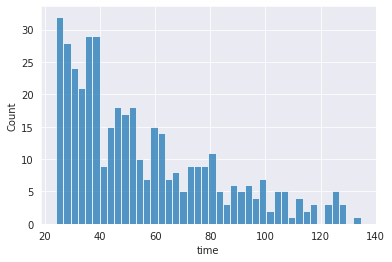

In [23]:
sns.histplot(df[df['target_binary']<df['event']]['time'], bins = int(np.sqrt(df.time.shape[0])))


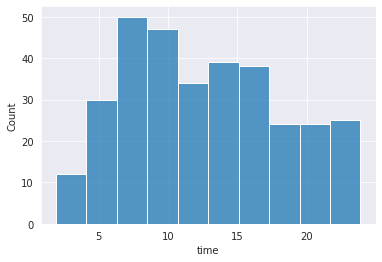

In [22]:
sns.histplot(df[df['target_binary']==1]['time'])

In [12]:
binned_event(df[["target_binary", "time", "event"]].iloc[7], months=df[df['event'] > 0].time.max())

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

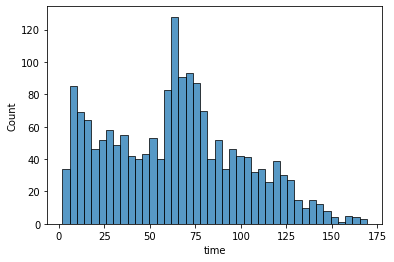

In [7]:
import seaborn as sns
sns.histplot(df.time, bins = int(np.sqrt(df.time.shape[0])))

In [18]:
for i in df.columns:
    print (i)
    print (df[i].unique())

Study ID
['RADCURE303' 'RADCURE304' 'RADCURE305' ... 'RADCURE4126' 'RADCURE4127'
 'RADCURE4128']
target_binary
[0 1]
survival_time
[ 6.03835616  5.8         9.17260274 ...  9.93150685 11.27671233
  5.82465753]
death
[0 1]
age at dx
[66.7 68.4 49.7 88.5 69.8 59.1 63.4 65.5 56.6 71.3 67.7 50.1 84.3 58.8
 76.  63.1 78.9 54.6 74.3 63.7 60.8 56.1 74.5 38.8 49.4 59.  78.6 57.9
 71.9 72.8 53.  79.5 81.  58.4 81.8 51.3 55.4 52.2 52.1 65.4 61.3 57.7
 85.  55.5 46.3 71.6 60.3 69.9 76.3 64.3 70.5 47.1 66.1 75.5 80.1 55.1
 60.4 49.1 61.7 68.3 73.3 83.3 43.8 62.2 56.5 75.1 62.9 62.  48.  69.3
 56.  63.5 77.2 59.7 59.5 73.4 69.5 75.7 46.5 69.  46.1 78.5 65.  61.2
 58.1 54.8 65.9 64.9 46.6 40.5 68.  68.2 71.1 49.8 77.1 76.4 78.2 57.4
 78.8 53.3 73.6 82.  62.6 70.4 74.4 58.3 56.7 81.5 78.  65.1 67.6 72.6
 76.9 77.6 34.4 59.2 53.7 65.6 67.1 64.4 58.2 71.8 65.8 79.2 42.9 69.1
 78.7 52.4 51.6 67.5 45.9 52.9 50.  53.2 46.  70.  60.1 72.9 68.1 58.5
 69.4 81.7 43.7 60.6 40.6 49.6 52.5 55.6 77.8 66.  66.3 90

In [5]:
def normalize(x):
    return [(i - min(x)) / (max(x) - min(x)) for i in x]


In [11]:
ohe_cols = ["Sex", "T Stage", "N Stage", "Stage", "Chemotherapy", "HPV Combined", "Disease Site"]
ecog_bool = df["ECOG"].apply(lambda x: 1 if x > 0 else 0)
continuous_vars = df[["Dose", "age at dx"]].apply(lambda x: normalize(x))
clin_var_data = pd.concat ([pd.get_dummies (df[ohe_cols], columns=ohe_cols), \
                            ecog_bool, continuous_vars], axis=1).fillna(0)

clin_var = clin_var_data.iloc[0].to_numpy(dtype="float32")
clin_var_data.shape

(1802, 44)

# Multiple events

In [37]:
rad_df = pd.read_csv ("/cluster/projects/radiomics/RADCUREHN/Clinical/Bratman-Radiomics-Definitive RT 2005-Aug2017-Dec 13'2018.csv")
rad_df

,MRN,Age,Sex,ECOG PS,Smoking PY,Smoking Hx,Drinking hx,Ds Site,Subsite,T,...,Date Local,Regional,Date Regional,Distant,Date Distant,2nd Ca,Date 2nd Ca,1st G3-4 Late Tox,Date 1st G3-4 Late Tox,Type of 1st G3-4 Late Tox
0,3191393,64.2,Male,ECOG 0,50,Current,ex-drinker,Unknown,NaN,T0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,09-06-2006,Soft Tissue Fibrosis/Necrosis
1,2106027,77.6,Female,ECOG 0,0,Non-smoker,non-drinker,esophagus,Cervical esophagus,T2,...,NaN,NaN,NaN,Yes,03-21-2005,NaN,NaN,NaN,NaN,NaN
2,210622,67.9,Female,ECOG 1,35,Ex-smoker,non-drinker,Larynx,Supraglottis,T2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
3,3187955,45.8,Male,ECOG 0,20,Ex-smoker,Moderate,Oropharynx,Tonsil,T2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,08-01-2018,Other
4,1240963,80.4,Male,ECOG 1,10,Ex-smoker,non-drinker,Oropharynx,Tonsillar Fossa,T4a,...,NaN,NaN,NaN,Yes,10-22-2007,NaN,NaN,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4125,2300777,70.9,Male,ECOG 0,25,Ex-smoker,light,Oropharynx,Base of Tongue,T2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4126,4475979,56.9,Male,ECOG 1,1,Ex-smoker,light,Oropharynx,Base of Tongue,T2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4127,4461825,21.6,Male,ECOG 1,0,Non-smoker,Moderate,Nasal Cavity,NaN,T4b,...,NaN,NaN,NaN,Yes,09-28-2017,NaN,NaN,NaN,NaN,NaN
4128,4478254,57.5,Male,ECOG 0,0,Non-smoker,non-drinker,Nasopharynx,Lat wall,T1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
import neptune

# The init() function called this way assumes that
# NEPTUNE_API_TOKEN environment variable is defined.

neptune.init('sejin.kim/sandbox', connection_mode='offline')
neptune.create_experiment(name='minimal_example')

# log some metrics

for i in range(100):
    neptune.log_metric('loss', 0.95**i)

neptune.log_metric('AUC', 0.96)

TypeError: init() got an unexpected keyword argument 'connection_mode'